In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
path = 'C:\\Users\\kaust\\Downloads\\SampleSuperstore.csv'

data = pd.read_csv(path)
data.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
361,Standard Class,Consumer,United States,New York City,New York,10009,East,Office Supplies,Labels,20.700,2,0.0,9.9360
4153,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19134,East,Office Supplies,Envelopes,4.896,3,0.2,1.6524
2471,Standard Class,Consumer,United States,Fayetteville,North Carolina,28314,South,Furniture,Bookcases,451.136,4,0.2,-67.6704
3708,Standard Class,Corporate,United States,Mesquite,Texas,75150,Central,Office Supplies,Appliances,34.176,3,0.8,-87.1488
2477,Second Class,Corporate,United States,Los Angeles,California,90036,West,Furniture,Tables,1322.352,3,0.2,-99.1764
296,First Class,Corporate,United States,Colorado Springs,Colorado,80906,West,Office Supplies,Binders,78.600,5,0.7,-62.8800
1911,Second Class,Corporate,United States,Houston,Texas,77041,Central,Office Supplies,Paper,273.896,7,0.2,92.4399
4014,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Labels,8.640,3,0.0,4.2336
8719,Second Class,Home Office,United States,Houston,Texas,77070,Central,Office Supplies,Paper,15.552,3,0.2,5.6376
5641,First Class,Home Office,United States,Meriden,Connecticut,6450,East,Office Supplies,Art,11.120,4,0.0,2.8912


<h2>Checking the data types</h2>

In [3]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

<h2>Checking for the Missing data</h2>

In [4]:
data.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [5]:
print(data.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


<h2>Finding the unique values in each Column</h2>

In [6]:
col = data.columns.values.tolist()
for column in col:
    print(column," : ",data[column].unique())

Ship Mode  :  ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment  :  ['Consumer' 'Corporate' 'Home Office']
Country  :  ['United States']
City  :  ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chape

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


C:\Users\kaust\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


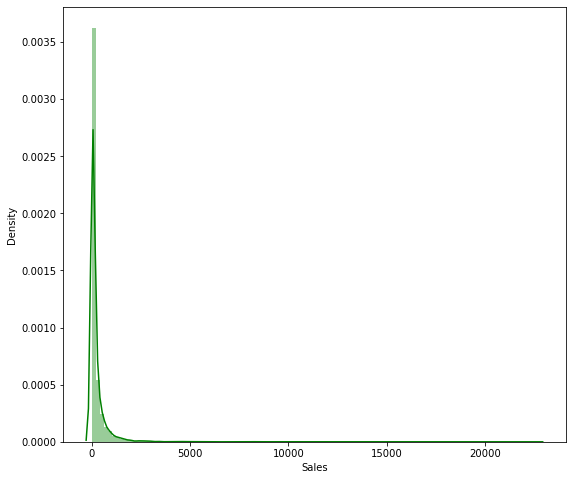

In [7]:
print(data['Sales'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['Sales'], color='g', bins=110, hist_kws={'alpha': 0.4});

<br>
<h2>Finding Segment wise sales Data</h2>
<ul>
    <li>The Consumer segement leads with most number of orders</li>
</ul>
<br>

<AxesSubplot:xlabel='Segment', ylabel='count'>

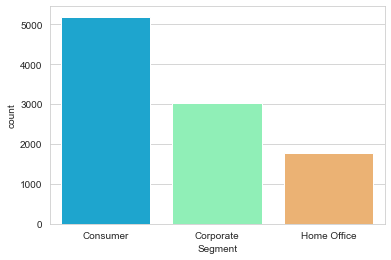

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Segment',data=data, palette='rainbow')

<br>
<h2>Finding region wise sales and profit</h2>
<ul>
    <li>West and East region shows the highest Sales and profit</li>
    <li>Central region has the lowest profit to Sales ratio</li>
    <li> Central region also has the lowest Sales</li>
</ul>
<br>

{'South': [391721.905, 46749.4303], 'West': [725457.8245, 108418.4489], 'Central': [501239.8908, 39706.3625], 'East': [678781.24, 91522.78]}


<AxesSubplot:>

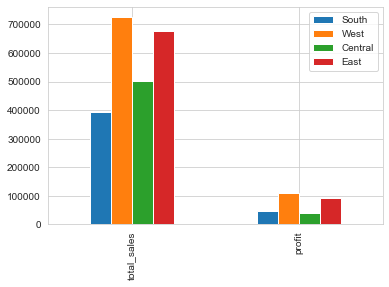

In [9]:
region = ['South', 'West', 'Central', 'East']

regional_data = {}
for reg in region:
    total_sales = data.loc[data['Region'] == reg,'Sales'].sum()
    total_profit = data.loc[data['Region'] == reg,'Profit'].sum()
    
    #print(total_sales, ' ',total_profit, '', (total_profit/total_sales))
    regional_data[reg] = [ total_sales,total_profit] 
print(regional_data)

df = pd.DataFrame(regional_data, index=['total_sales', 'profit'])
df.plot.bar()

<h2>Category wise Sales and profit Distribution</h2>
<ul>
    <li>Technology and Office Supplies Sales are highest</li>
    <li>Furniture sales has the lowest profit</li>
</ul>
<br>

{'Furniture': [741999.7953, 18451.272800000006], 'Office Supplies': [719047.032, 122490.8008], 'Technology': [836154.033, 145454.9481]}


<AxesSubplot:>

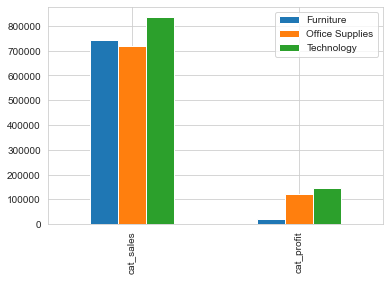

In [10]:
category = ['Furniture', 'Office Supplies', 'Technology']

categorial_data = {}
for cat in category:
    cat_sales = data.loc[data['Category'] == cat,'Sales'].sum()
    cat_profit = data.loc[data['Category'] == cat,'Profit'].sum()
    
    #print(total_sales, ' ',total_profit, '', (total_profit/total_sales))
    categorial_data[cat] = [ cat_sales,cat_profit] 
print(categorial_data)

df_cat = pd.DataFrame(categorial_data, index=['cat_sales', 'cat_profit'])
df_cat.plot.bar()

<br>
<h2>Region Wise Category Sales</h2>
<br>

{'South': {'Furniture': [117298.68400000001, 6771.2061], 'Office Supplies': [125651.313, 19986.3928], 'Technology': [148771.908, 19991.831400000003]}, 'West': {'Furniture': [252612.7435, 11504.9503], 'Office Supplies': [220853.249, 52609.849], 'Technology': [251991.832, 44303.649600000004]}, 'Central': {'Furniture': [163797.1638, -2871.0494000000003], 'Office Supplies': [167026.415, 8879.979899999998], 'Technology': [170416.31199999998, 33697.432]}, 'East': {'Furniture': [208291.204, 3046.1658000000007], 'Office Supplies': [205516.055, 41014.5791], 'Technology': [264973.981, 47462.0351]}}


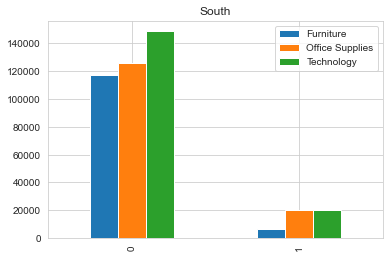

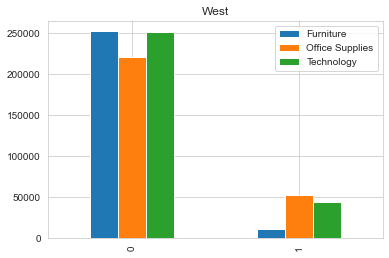

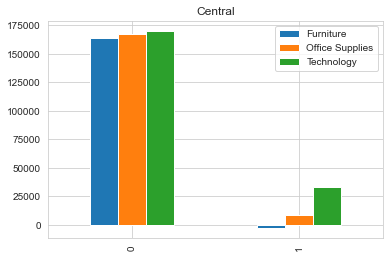

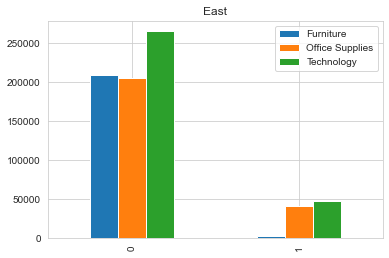

In [11]:
category = ['Furniture', 'Office Supplies', 'Technology']
region = ['South', 'West', 'Central', 'East']

cat_data =  {}

for reg in region:
    cat_sales = {}
    for cat in category:
        total_sales = data.loc[(data['Region'] == reg) & (data['Category'] == cat), 'Sales'].sum()
        total_profit = data.loc[(data['Region'] == reg) & (data['Category'] == cat), 'Profit'].sum()
        cat_sales[cat] = [total_sales, total_profit]
    cat_data[reg] = cat_sales

print(cat_data)

i = 1

for reg in region:
    D = cat_data[reg]
    df_temp = pd.DataFrame(D)
#     plt.subplot(2,2,i)
    df_temp.plot.bar()
    plt.title(reg)
    i = i+1

<br>
<h2>PLotting the Sales profit of Sub-Category Data</h2>
<br>

<seaborn.axisgrid.FacetGrid object at 0x0000020231C77730> <seaborn.axisgrid.FacetGrid object at 0x0000020231C88580> <seaborn.axisgrid.FacetGrid object at 0x0000020231C68610>


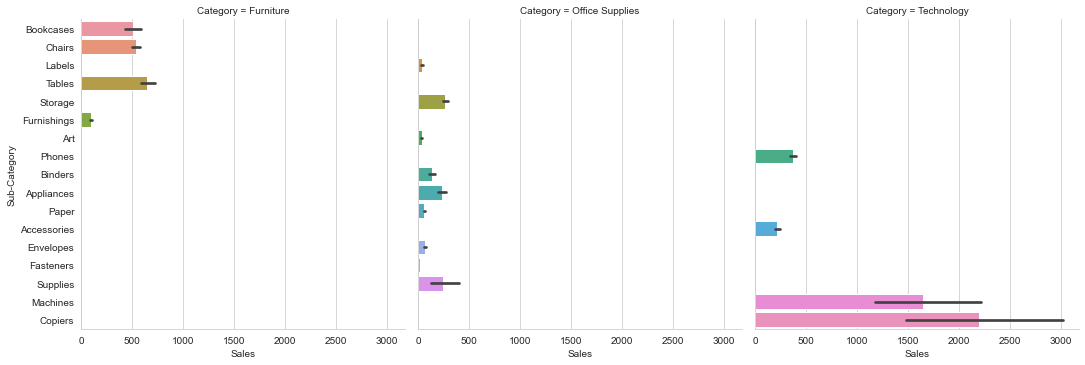

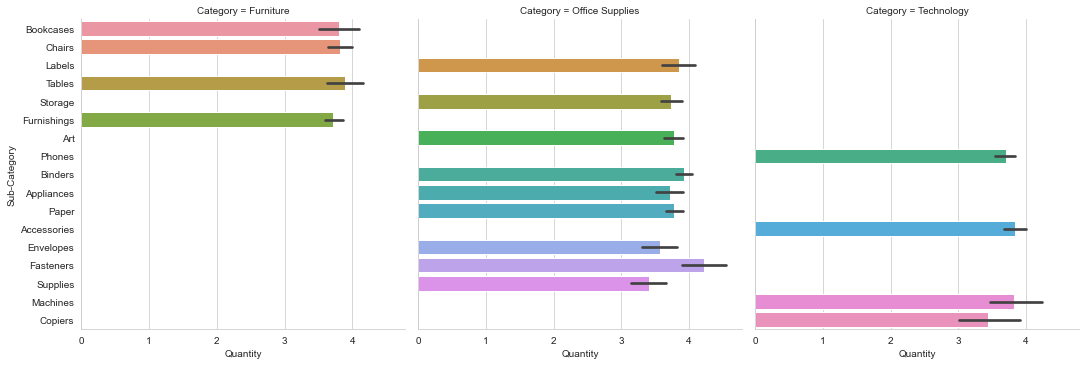

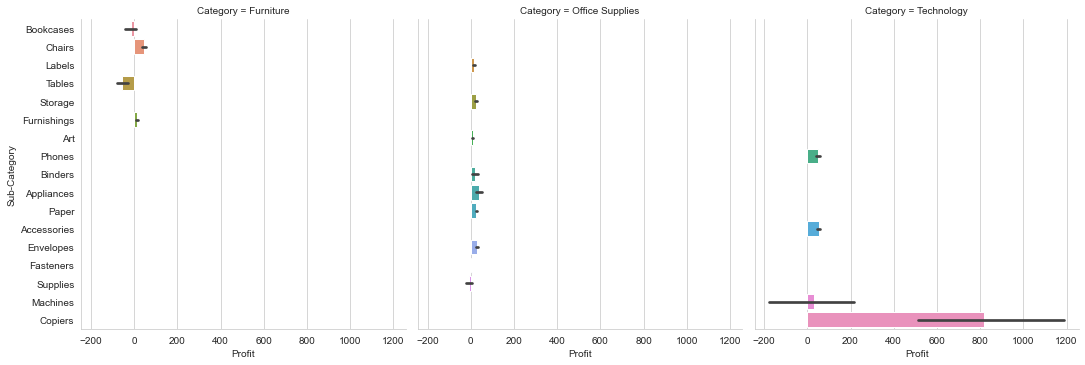

In [12]:
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=data,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=data,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=data,
                kind='bar')

print(x,y,z)

<br>
<h2>Sales based on distribution Mode</h2>
    <ul>
    <li>Standard Class Shiiping has highest Count</li>
    <li>Shipping mode of same day has lowest count , because of extra charges</li>
    </ul>
    <br>

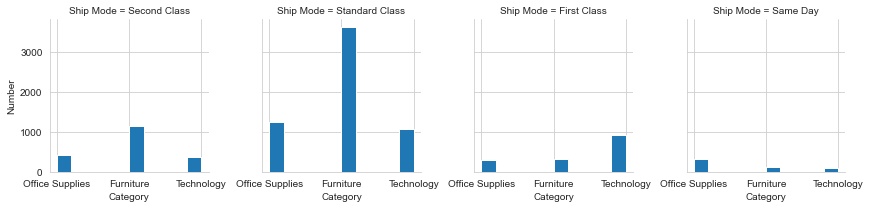

In [13]:
category_hist = sns.FacetGrid(data, col='Ship Mode', palette='rainbow')
category_hist.map(plt.hist, 'Category')
category_hist.set_ylabels('Number')

<br>
<h2>City wise Distribution</h2>
<br>

In [25]:
pro = data.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])
pro

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


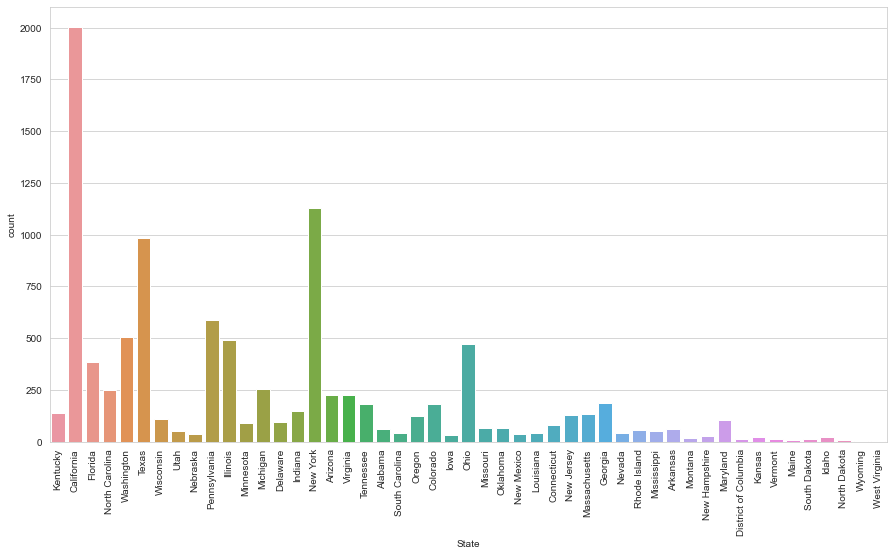

In [24]:
#print(data['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()

C:\Users\kaust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


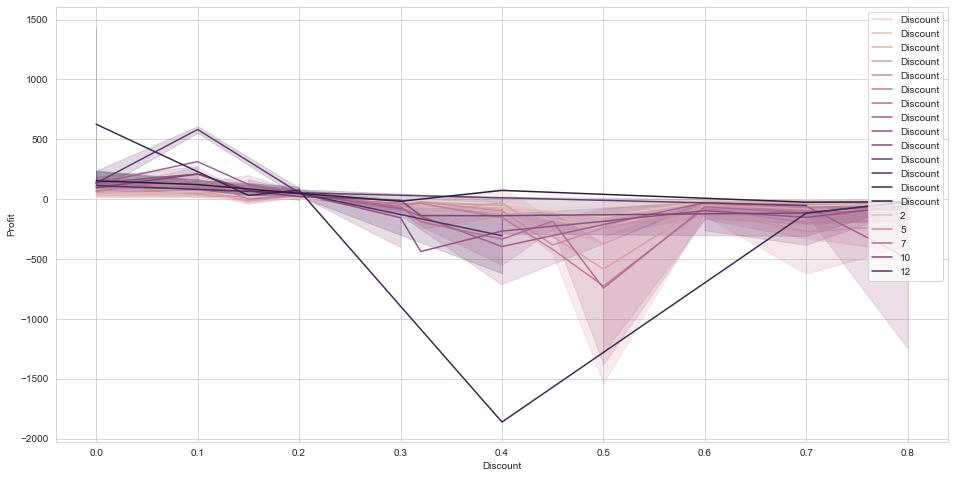

In [15]:
plt.figure(figsize = (16,8))
sns.lineplot('Discount', 'Profit','Quantity', data = data, color = 'r', label= 'Discount')
plt.legend()

<h1>Conclusion</h1>
<ul>
    <li>Techonology Sales are the highest regardless of the region</li>
    <li>Office supplies are highest in Western region.</li>
    <li>Least Profit is made by selling furnitures</li>
    <li>Central region has highest furniture Sales and profit.</li>
</ul>

<h1>Thank You</h1>
<ul><h3>Kaustuva Kumar Sahu</h3></ul>